In [1]:
#Imports & Environment Setup

# Core data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLP & ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Date handling
from datetime import datetime

# Settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


In [2]:
# Downloading NLTK
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading the Dataset

In [3]:
df = pd.read_csv("Hanuai task2 assignment.csv")
print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (1000, 20)


,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT,Trigger,Failure Component,Failure Condition,Additional Context,Fix Component,Fix Condition
0,D-14801,9/17/2019,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14T00:00:00.000Z,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-10T00:00:00.000Z,NovaSprint,AeroSpecter,2020,FLT,['No Additional Functionality'],"['Audio Unit', 'Display']","['Controls Irresponsive', 'Black Screen']",['No Additional Context'],"['Radio', 'SPS']","['Replaced', 'Programmed']"
1,D-14869,7/6/2020,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,2019-08-16T00:00:00.000Z,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2020-03-26T00:00:00.000Z,NebulaCruiser,StellarGlide,2020,FTW,['No Additional Functionality'],"['Radio', 'Display', 'Radio']","['Inoperative', 'Black Screen', 'No Sound']",['No Additional Context'],"['Radio', 'USB']","['Replaced', 'Programmed']"
2,D-14555,1/9/2020,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,2019-08-06T00:00:00.000Z,Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,2019-11-29T00:00:00.000Z,ThunderVolt,HyperFury X,2020,FLT,['No Additional Functionality'],"['Display', 'OnStar', 'Radio Module']","['Inoperative', 'Inoperative', 'Internal Fault']",['No Additional Context'],['Radio'],['Replaced']
3,D-14704,4/14/2020,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,2019-08-12T00:00:00.000Z,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,2019-12-26T00:00:00.000Z,ThunderVolt,HyperFury X,2020,SHT,['When Reversing'],['Display'],['Black Screen'],['While Driving'],"['Radio', 'USB']","['Replaced', 'Programmed']"
4,D-15142,11/23/2020,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27T00:00:00.000Z,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-10-31T00:00:00.000Z,ThunderVolt,TurboFlare,2020,FTW,['No Additional Functionality'],['Radio'],['Malfunction'],['No Additional Context'],['Radio'],['Replaced']


## Initial Data Understanding

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event id             1000 non-null   object
 1   Opened date          1000 non-null   object
 2   CAUSAL_VERBATIM      999 non-null    object
 3   CORRECTION_VERBATIM  1000 non-null   object
 4   CUSTOMER_VERBATIM    1000 non-null   object
 5   BUILD_DATE           1000 non-null   object
 6   BUILD_PLANT_DESC     1000 non-null   object
 7   CAUSAL_CD_DESC       997 non-null    object
 8   COMPLAINT_CD_DESC    1000 non-null   object
 9   IN_USE_DATE          999 non-null    object
 10  MAKE                 1000 non-null   object
 11  MODEL                1000 non-null   object
 12  MODLYR               1000 non-null   int64 
 13  PLANT                1000 non-null   object
 14  Trigger              5 non-null      object
 15  Failure Component    5 non-null      object
 16  Failure

In [5]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Event id,1000,1000,D-14801,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opened date,1000,397,10/7/2020,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAUSAL_VERBATIM,999,944,RADIO,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CORRECTION_VERBATIM,1000,952,REPLACED RADIO,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTOMER_VERBATIM,1000,990,Audio Entertainment Navigation Other issues,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILD_DATE,1000,37,2019-08-28T00:00:00.000Z,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILD_PLANT_DESC,1000,8,Fort Wayne,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAUSAL_CD_DESC,997,38,Module/Component-No/Incorrect Communication,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMPLAINT_CD_DESC,1000,9,Audio/Entertainment/Navigation - Audio,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IN_USE_DATE,999,285,2019-10-31T00:00:00.000Z,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning & Preparation

Date Parsing

In [6]:
df['Opened date'] = pd.to_datetime(df['Opened date'], errors='coerce')


Removing Duplicates

In [7]:
df = df.drop_duplicates()


Cleaning List-Based Columns


In [8]:
list_columns = [
    'Failure Component', 'Failure Condition',
    'Fix Component', 'Fix Condition',
    'Additional Context'
]

def clean_list_column(val):
    if isinstance(val, str):
        val = re.sub(r"[\[\]']", "", val)
        items = [v.strip() for v in val.split(",")]
        return list(set(items))  # remove duplicates
    return []

for col in list_columns:
    df[col] = df[col].apply(clean_list_column)


## Identifying Stakeholder-Critical Columns

In [9]:
critical_columns = [
    'Opened date',
    'CAUSAL_VERBATIM',
    'CORRECTION_VERBATIM',
    'CUSTOMER_VERBATIM',
    'Failure Component',
    'Failure Condition',
    'Fix Component',
    'Fix Condition'
]

df[critical_columns].head()


,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,Failure Component,Failure Condition,Fix Component,Fix Condition
0,2019-09-17,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,"[Audio Unit, Display]","[Controls Irresponsive, Black Screen]","[SPS, Radio]","[Programmed, Replaced]"
1,2020-07-06,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,"[Display, Radio]","[Inoperative, No Sound, Black Screen]","[USB, Radio]","[Programmed, Replaced]"
2,2020-01-09,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,"[Radio Module, OnStar, Display]","[Inoperative, Internal Fault]",[Radio],[Replaced]
3,2020-04-14,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,[Display],[Black Screen],"[USB, Radio]","[Programmed, Replaced]"
4,2020-11-23,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,[Radio],[Malfunction],[Radio],[Replaced]


These columns directly represent failure origin, customer perception, and resolution strategy, making them most valuable for engineering and quality stakeholders.

## Exploratory Data Analysis (EDA)

Most Frequent Failure Components

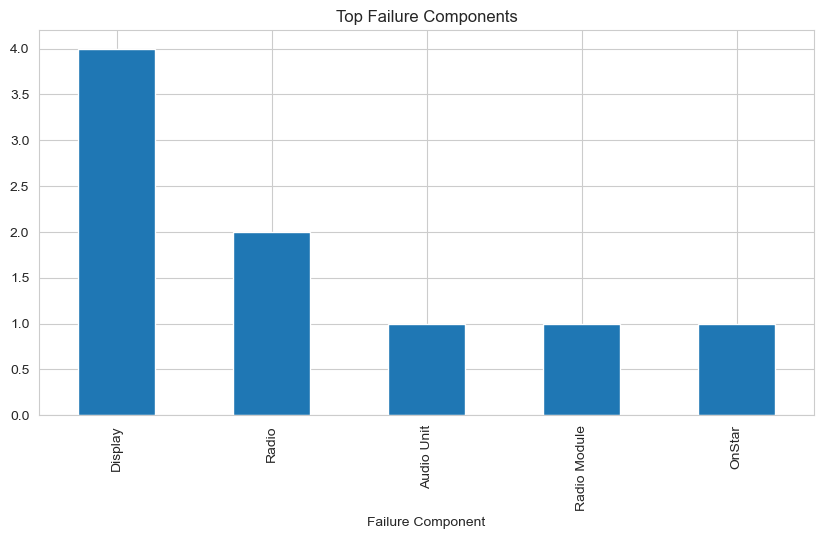

In [10]:
failure_components = df.explode('Failure Component')
top_components = failure_components['Failure Component'].value_counts().head(10)

top_components.plot(kind='bar', figsize=(10,5), title="Top Failure Components")
plt.show()


Interpretation :
A small subset of components contributes disproportionately to total failures, indicating potential systemic quality issues.

In [11]:
failure_conditions = df.explode('Failure Condition')
failure_conditions['Failure Condition'].value_counts().head(10)


Failure Condition
Black Screen             3
Inoperative              2
Controls Irresponsive    1
No Sound                 1
Internal Fault           1
Malfunction              1
Name: count, dtype: int64

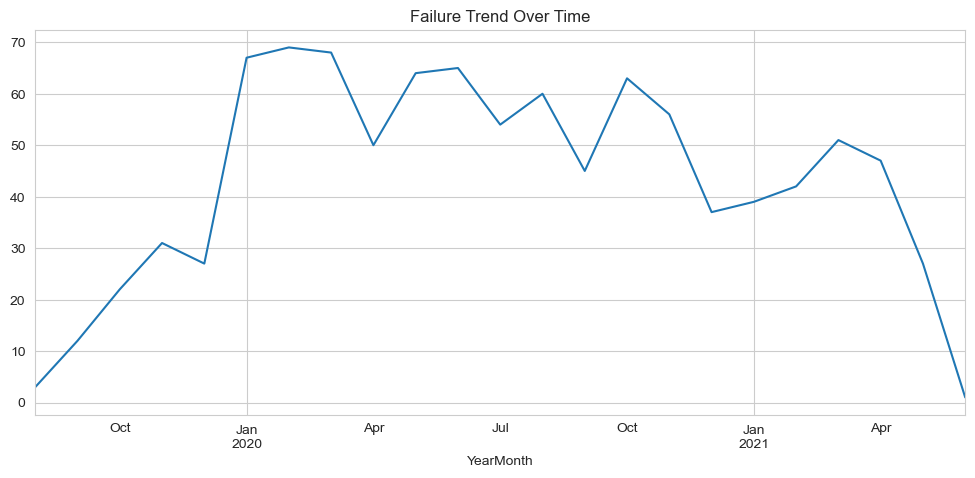

In [12]:
df['YearMonth'] = df['Opened date'].dt.to_period('M')

df.groupby('YearMonth').size().plot(figsize=(12,5), title="Failure Trend Over Time")
plt.show()


Why this matters:
Helps correlate spikes with software releases, supplier batches, or environmental factors.

## Text Mining – NLP Pipeline

Unified view of failure narrative.

In [13]:
df['combined_text'] = (
    df['CAUSAL_VERBATIM'].fillna('') + " " +
    df['CUSTOMER_VERBATIM'].fillna('') + " " +
    df['CORRECTION_VERBATIM'].fillna('')
)


## Text Preprocessing


In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df['clean_text'] = df['combined_text'].apply(preprocess_text)


Domain-specific technical terms were intentionally preserved to avoid loss of engineering context.

## Failure Type Categorization (Business-Centric)

In [15]:
def categorize_issue(text):
    if any(k in text for k in ['black screen', 'freeze', 'boot', 'software']):
        return 'Software Issue'
    elif any(k in text for k in ['ground', 'power', 'voltage', 'wiring']):
        return 'Electrical Issue'
    elif any(k in text for k in ['replace', 'internal', 'module failure']):
        return 'Hardware Failure'
    elif any(k in text for k in ['intermittent', 'unable duplicate']):
        return 'Intermittent Issue'
    else:
        return 'User Reported / Other'

df['Issue Category'] = df['clean_text'].apply(categorize_issue)


In [16]:
df['Issue Category'].value_counts()


Issue Category
Hardware Failure         546
Electrical Issue         211
Software Issue           174
User Reported / Other     62
Intermittent Issue         7
Name: count, dtype: int64

## Clustering / Topic Modeling (Failure Modes)

TF-IDF Vectorization

In [17]:
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['clean_text'])


KMeans Clustering

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Failure Cluster'] = kmeans.fit_predict(X)


C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Interpretation guidance:
Each cluster represents a dominant failure mode combining symptom, component, and resolution pattern.

## Output for Deliverables

Exporting Text Mining Results

In [19]:
output_cols = [
    'Event id', 'Issue Category',
    'Failure Cluster', 'Failure Component',
    'Failure Condition', 'Fix Component'
]

df[output_cols].to_csv("task2_text_mining_output.csv", index=False)
